In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw
import matplotlib.cm as cm

This notebook compares two simulation of a plastic prticle sinking in the ocean using two integration schemes: simple Euler (RK1) and Runge-Kutta 4 (RK4)

The reason behind this comparisson is that implementing the Runge Kutta 4 scheme in parcels for solving the sinking velocity is not straight forward. It requires to do multiple call back of the TEOS10 equation to compute the surrounding density of the particle. This forces us to use a ScipyParticle class in Parcels, which is slower compared to a JITparticle. The RK1 scheme can be programmed in a JITparticle class, which makes it more conveninet and faster. 

So to recap, we want to know what is the error of using RK1 compared to RK4.


In [3]:
RK1 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/RK1_1m_t25_rho1380.nc')
RK4 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/RK4_1m_t25_rho1380.nc')

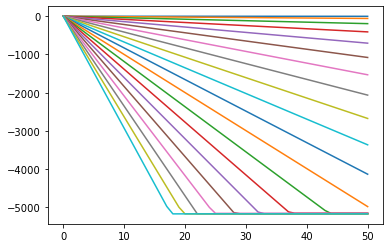

In [4]:
for i in range(0, 1000, 50):
    plt.plot(-RK1['z'][i,:], label=RK1['alpha'][i,0].values)
# plt.plot(-RK4['z'][0,:])
# plt.legend()

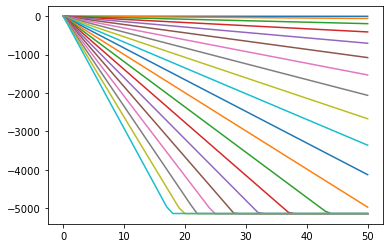

In [5]:
for i in range(0, 1000, 50):
    plt.plot(-RK4['z'][i,:], label=RK4['alpha'][i,0].values)
# plt.plot(-RK4['z'][0,:])
# plt.legend()

In [6]:
particle_sizes = RK1['alpha'][:,0]*1000 # in milimeters
n_particles = len(particle_sizes)

In [7]:
x_colors = np.linspace(0,1, n_particles)
colors = cm.get_cmap('viridis_r')(x_colors)

In [8]:
mean_diff = np.mean(RK1['z']/RK4['z'], axis=1)
std_diff = np.std(RK1['z']/RK4['z'], axis=1)

In [9]:
mean_diff_vs = np.mean(RK1['v_s']/RK4['v_s'], axis=1)
std_diff_vs = np.std(RK1['v_s']/RK4['v_s'], axis=1)

In [30]:
ratios = mean_diff - 1

In [47]:
idx_big = np.where(ratios > 1e-3)[0]

In [48]:
idx_big[0]

707

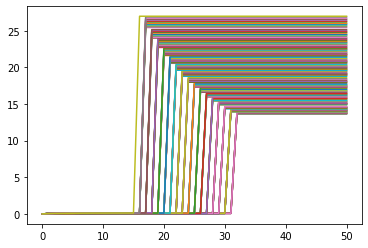

In [57]:
for j in idx_big:
    plt.plot(RK1['z'][j, :] - RK4['z'][j, :])

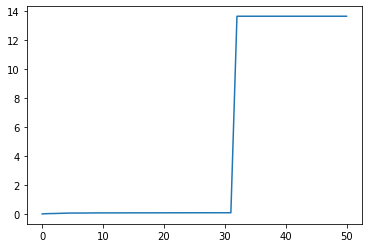

In [54]:
plt.plot(RK1['z'][707, :] - RK4['z'][707, :])
# plt.plot(-RK1['z'][707, :])

In [33]:
ratios < 1e-3

<xarray.DataArray 'z' (traj: 1000)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
...
       False,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True, False,  True,  True, False,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True, False, False,  True, False,  True, False, False,
        True, False,  True, False,  True,  True, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
        True, False,  True, False,  True,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True,  True, False,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False])
Dimensions without coordinates: traj

In [18]:
ratios[800:]

<xarray.DataArray 'z' (traj: 200, obs: 51)>
array([[1.        , 1.00012836, 1.00007364, ..., 1.00001833, 1.00001833,
        1.00001833],
       [1.        , 1.0001284 , 1.00007363, ..., 1.00338745, 1.00338745,
        1.00338745],
       [1.        , 1.00012841, 1.00007361, ..., 1.00339767, 1.00339767,
        1.00339767],
       ...,
       [1.        , 1.00011423, 1.00010019, ..., 1.00522138, 1.00522138,
        1.00522138],
       [1.        , 1.00012641, 1.0001063 , ..., 1.00002673, 1.00002673,
        1.00002673],
       [1.        , 1.00012651, 1.00010642, ..., 1.00524627, 1.00524627,
        1.00524627]])
Dimensions without coordinates: traj, obs

In [88]:
plt.rcParams.update({'font.size':13})

(0.0, 0.1)

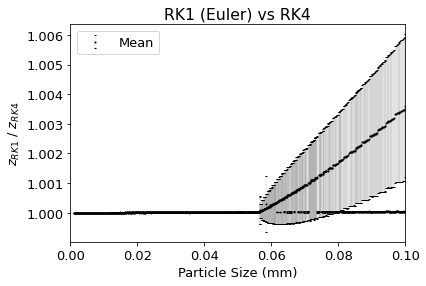

In [101]:
plt.errorbar(particle_sizes, mean_diff, yerr=std_diff,label='Mean', fmt = 'o', ms=1, color = 'black', 
            ecolor = 'black', elinewidth = 0.11, capsize=1)
# plt.scatter(particle_sizes, mean_diff)
# plt.fill_between(particle_sizes, mean_diff + std_diff, mean_diff - std_diff)
plt.legend()
plt.ylabel('$z_{RK1}$ / $z_{RK4}$')
plt.xlabel('Particle Size (mm)')
plt.title('RK1 (Euler) vs RK4')
plt.xlim(0,0.1)
# plt.xlim(0.055,0.08)

Investigate the 1's at the for particles larger than 0.06mm

(0.0, 0.1)

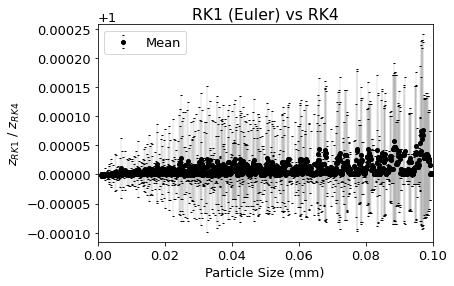

In [71]:
plt.errorbar(particle_sizes, mean_diff_vs, yerr=std_diff_vs,label='Mean', fmt = 'o', ms=4, color = 'black', 
            ecolor = 'black', elinewidth = 0.11, capsize=1)
plt.legend()
plt.ylabel('$z_{RK1}$ / $z_{RK4}$')
plt.xlabel('Particle Size (mm)')
plt.title('RK1 (Euler) vs RK4')
plt.xlim(0,0.1)

Text(0, 0.5, 'Depth RK4 (m)')

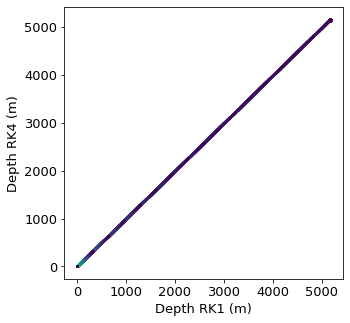

In [61]:
plt.figure(figsize=(5,5))

for i in range(n_particles):
    plt.scatter(RK1['z'][i,:], RK4['z'][i,:], s=1, color=colors[i]);

plt.xlabel('Depth RK1 (m)')
plt.ylabel('Depth RK4 (m)')

Text(0, 0.5, 'V_S RK4 (m/s)')

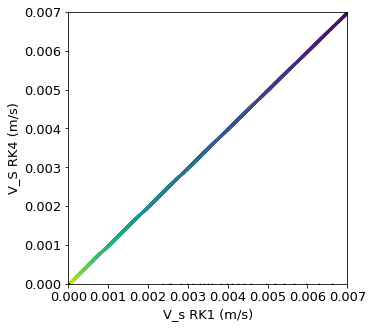

In [66]:
plt.figure(figsize=(5,5))

for i in range(n_particles):
    plt.scatter(RK1['v_s'][i,:], RK4['v_s'][i,:], s=1, color=colors[i]);

plt.xlim(0, 0.007)
plt.ylim(0, 0.007)
plt.xlabel('V_s RK1 (m/s)')
plt.ylabel('V_S RK4 (m/s)')

In [ ]:
plt.figure(figsize=(5,5))

for i in range(n_particles):
    plt.scatter(RK1['z'][i,:], RK4['z'][i,:], s=1, color=colors[i]);

plt.xlabel('Depth RK1 (m)')
plt.ylabel('Depth RK4 (m)')

(array([711.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  11.,  27.,
         25.,  22.,  23.,  19.,  20.,  15.,  14.,  12.,  14.,   8.,  12.,
         10.,   9.,  10.,   9.,   8.,   8.,   6.,   7.]),
 array([-2.05450641e-05,  8.99210554e-01,  1.79844165e+00,  2.69767275e+00,
         3.59690385e+00,  4.49613495e+00,  5.39536605e+00,  6.29459715e+00,
         7.19382824e+00,  8.09305934e+00,  8.99229044e+00,  9.89152154e+00,
         1.07907526e+01,  1.16899837e+01,  1.25892148e+01,  1.34884459e+01,
         1.43876770e+01,  1.52869081e+01,  1.61861392e+01,  1.70853703e+01,
         1.79846014e+01,  1.88838325e+01,  1.97830636e+01,  2.06822947e+01,
         2.15815258e+01,  2.24807569e+01,  2.33799880e+01,  2.42792191e+01,
         2.51784502e+01,  2.60776813e+01,  2.69769124e+01]),
 <BarContainer object of 30 artists>)

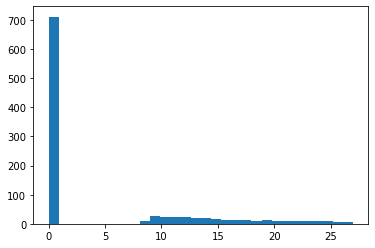

In [6]:
plt.hist(RK1['z'][:,-1] - RK4['z'][:,-1], bins=30)

In [7]:
sim60_v_s = xr.load_dataset(path + 'SA_60m_s02_t600.nc')

NameError: name 'path' is not defined

In [8]:
sim60_no_v_s = xr.load_dataset(path + 'SA_60m_s02_t600_no-v_s.nc')

In [9]:
sim60_no_v_s

<xarray.Dataset>
Dimensions:           (traj: 1000, obs: 601)
Dimensions without coordinates: traj, obs
Data variables:
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... 999.0 999.0 999.0
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2018...
    lat               (traj, obs) float64 -32.15 -32.22 -32.32 ... -39.09 -39.06
    lon               (traj, obs) float64 6.278 6.621 6.954 ... -2.501 -2.561
    z                 (traj, obs) float64 60.0 59.99 60.75 ... 131.1 130.0 128.9
    cons_temperature  (traj, obs) float32 0.0 18.42 17.81 ... 11.93 12.11 11.86
    abs_salinity      (traj, obs) float32 0.0 35.65 35.59 ... 34.85 34.89 34.82
    mld               (traj, obs) float32 0.0 44.68 47.69 ... 69.0 71.44 68.75
    alpha             (traj, obs) float32 1e-06 1e-06 1e-06 ... 1e-06 1e-06
    density           (traj, obs) float32 1.035e+03 1.026e+03 ... 1.026e+03
    v_s               (traj, obs) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

Text(0, 0.5, 'Depth (m)')

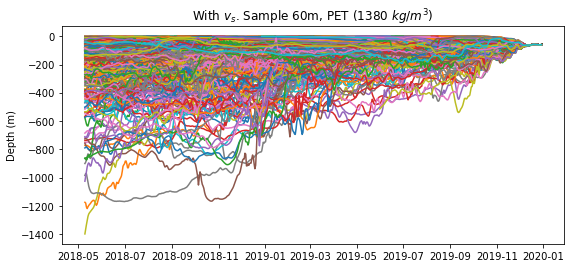

In [10]:
plt.figure(figsize=(9,4))

for i in range(1000):
    plt.plot(sim60_v_s['time'][i, 1:], -sim60_v_s['z'][i, 1:])
    
plt.title(r'With $v_s$. Sample 60m, PET (1380 $kg/m^3$)')
plt.ylabel('Depth (m)')

Text(0, 0.5, 'Depth (m)')

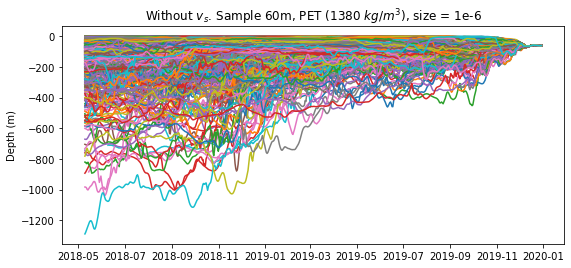

In [11]:
plt.figure(figsize=(9,4))

for i in range(1000):
    plt.plot(sim60_no_v_s['time'][i, 1:], -sim60_no_v_s['z'][i, 1:], )

plt.title(r'Without $v_s$. Sample 60m, PET (1380 $kg/m^3$), size = 1e-6')
plt.ylabel('Depth (m)')

----------

In [13]:
sim_rk4 = xr.load_dataset(path + 'RK4_5m_t10.nc')

### wrong!

In [18]:
sim_rk4['z'][}

<xarray.DataArray 'z' (traj: 100, obs: 21)>
array([[5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727],
       [5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727],
       [5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727],
       ...,
       [5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727],
       [5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727],
       [5.        , 5.03258146, 5.06516071, ..., 5.58641464, 5.61898912,
        5.65156727]])
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  depth
    units:          m
    positive:       down